In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

# You'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
import cv2
from sklearn.utils import shuffle

print(tf.__version__) 


Found GPU at: 
2.2.0


In [2]:
from IPython.display import clear_output, display
import os.path
from os import path
import shutil
import PIL
from pathlib import Path
from matplotlib import pyplot as plt

In [3]:
def read_label( path):
  f= open( path)
  d= f.read()
  f.close()
  return d 

def write_label( path, text):
  f= open( path, "w")
  f.write( text)
  f.close()

def show_image( img, name= 'noname'):
  plt.imshow( img)
  plt.title( name)
  plt.show()

def show_gimage( img, name= 'noname'):
  plt.imshow( img, cmap= 'gray')
  plt.title( name)
  plt.show()

def _load_image( path):
  # return cv2.imread( path, cv2.IMREAD_GRAYSCALE)
  return cv2.imread( path)
  
def write_image( path, img):
  cv2.imwrite( path, img)

def resize( img, scale_percent= 60, verbose=False):
  #scale_percent = 60 # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  if verbose:
    print( "scale", scale_percent)
    print( "dim", dim)
  # resize image
  return cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 

In [4]:
img= _load_image( 'C:/mestrado/datasets/handmade/sample_to_parts/images/540.jpg')

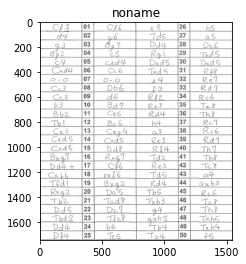

In [5]:
show_image( img)

In [6]:
img.shape

(1745, 1545, 3)

In [7]:
w= 336
h= 70
cols= [0, 430, 766, 1200]
nlines= 25

In [8]:
len( cols)

4

In [9]:
for j in range( 0, len( cols)):
    print( j)

0
1
2
3


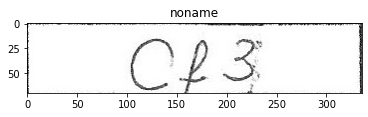

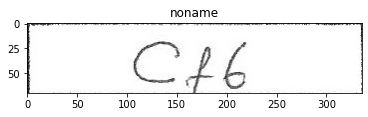

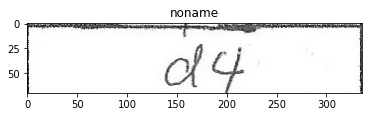

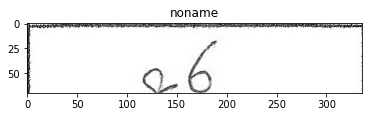

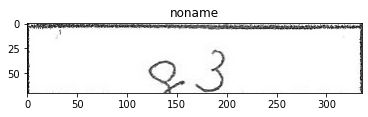

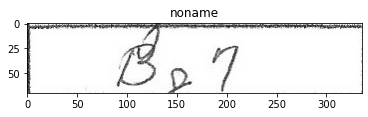

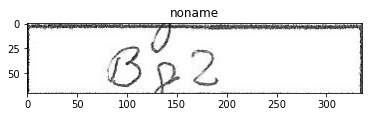

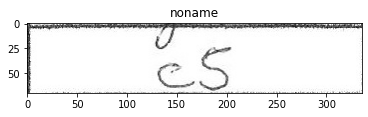

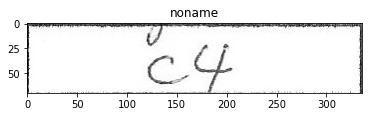

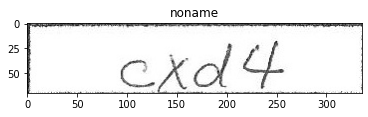

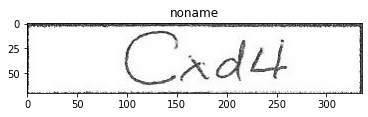

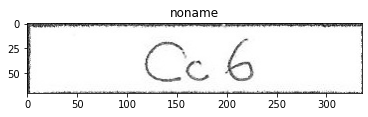

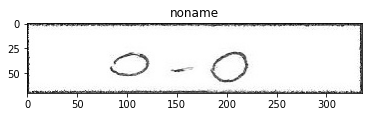

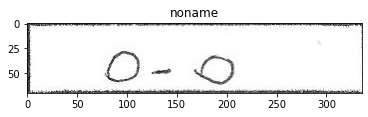

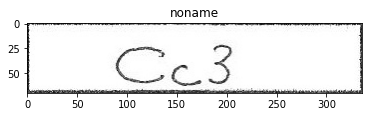

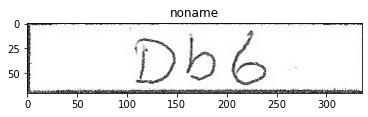

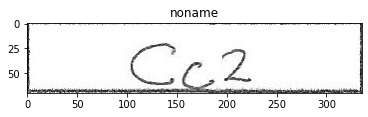

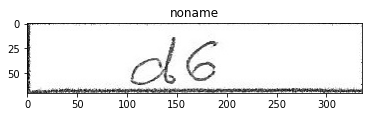

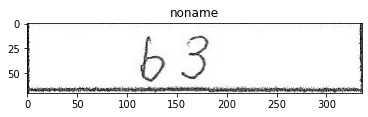

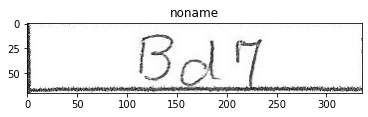

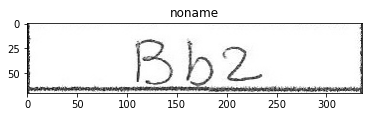

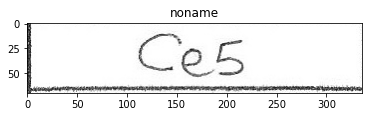

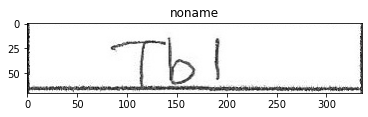

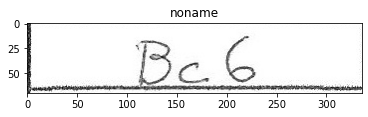

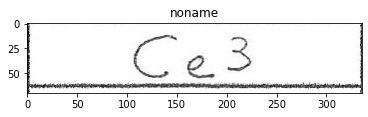

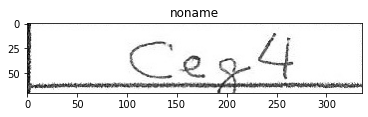

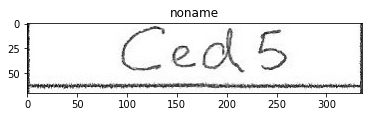

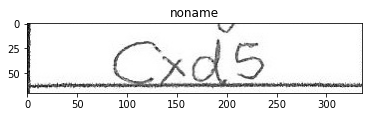

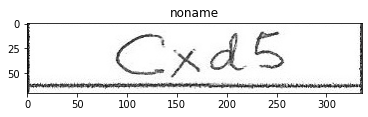

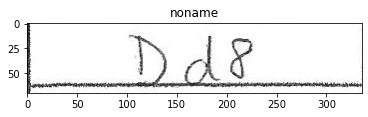

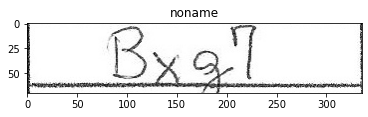

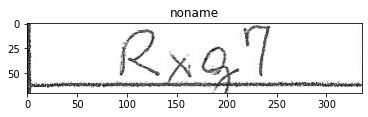

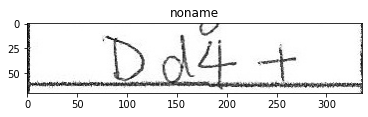

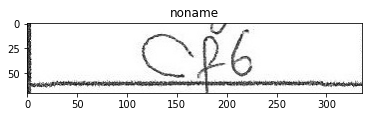

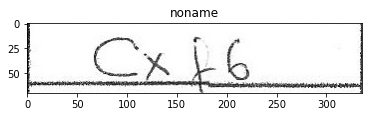

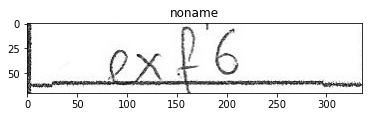

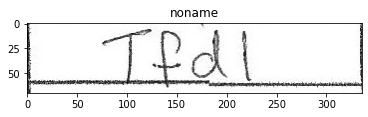

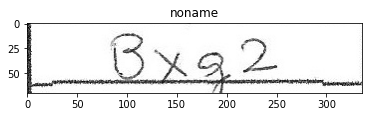

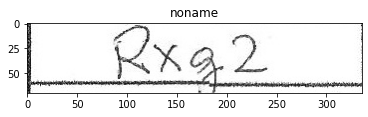

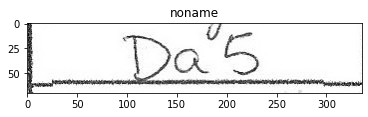

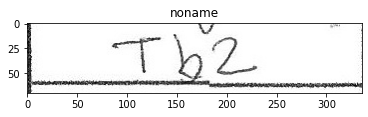

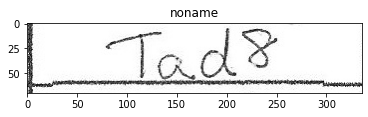

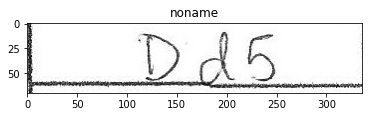

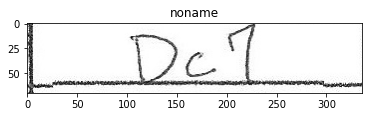

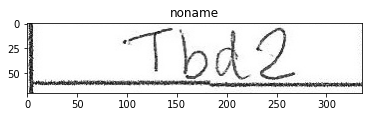

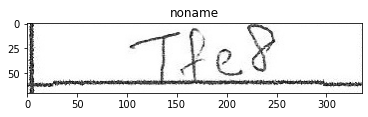

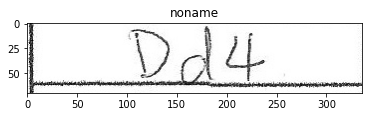

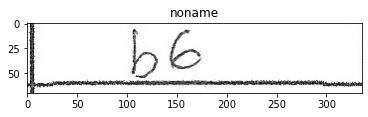

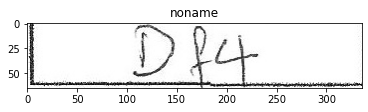

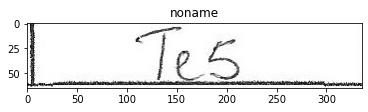

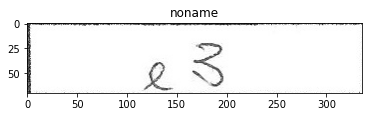

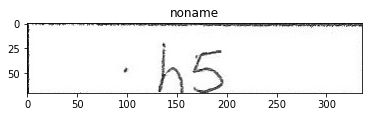

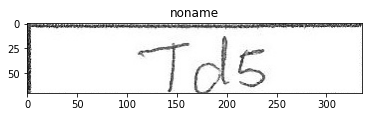

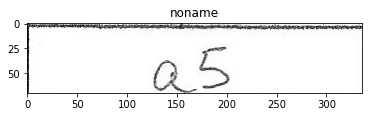

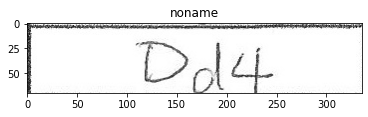

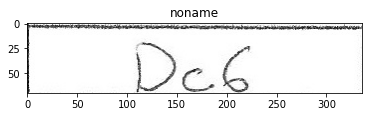

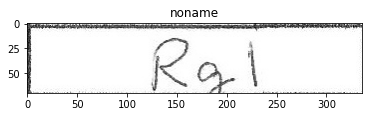

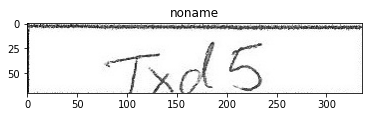

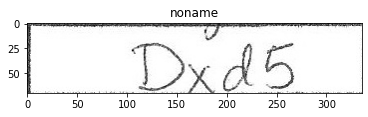

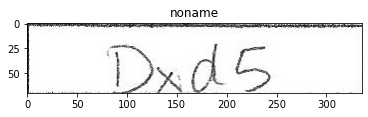

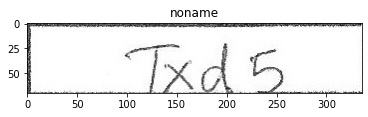

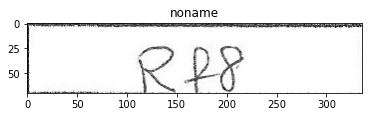

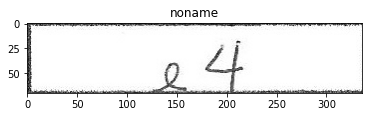

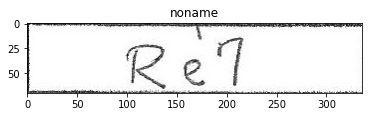

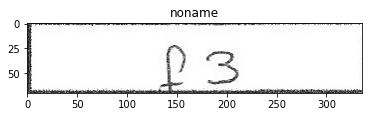

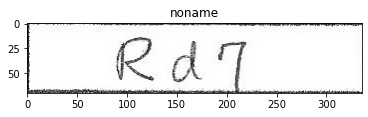

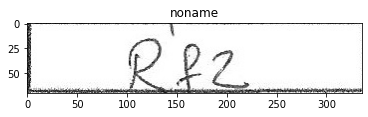

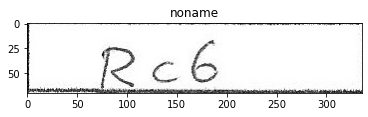

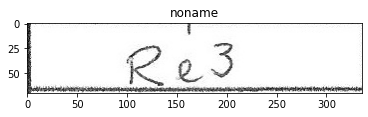

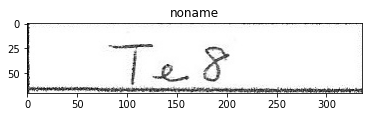

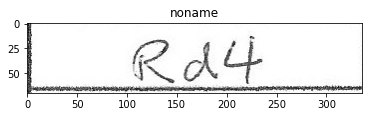

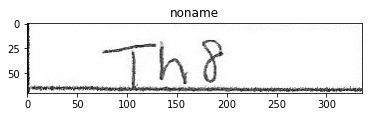

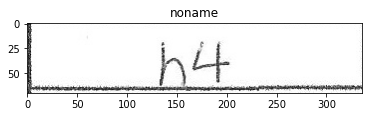

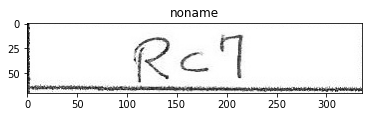

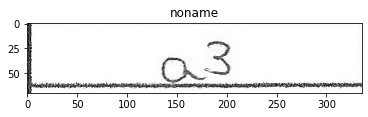

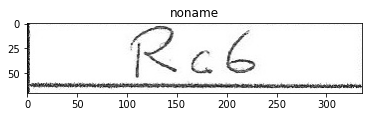

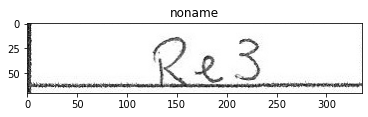

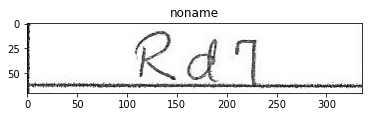

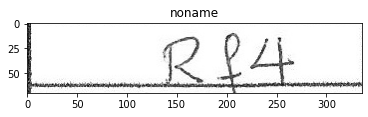

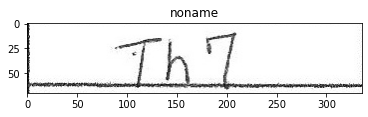

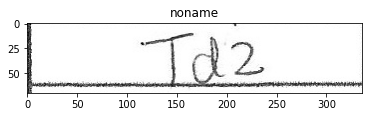

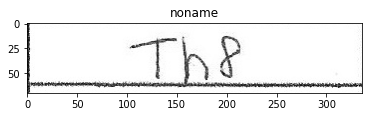

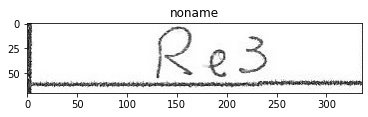

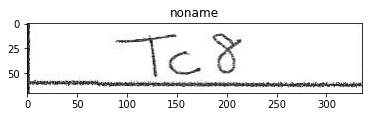

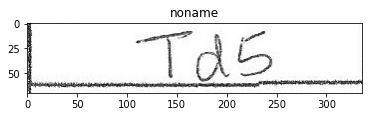

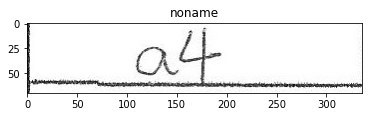

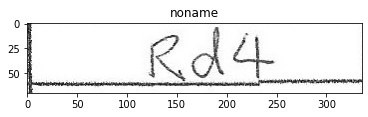

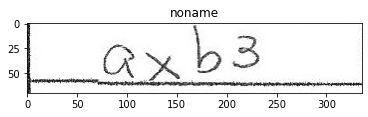

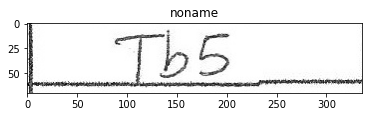

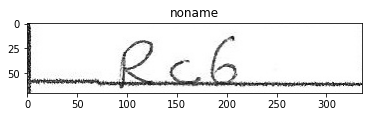

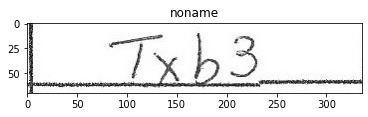

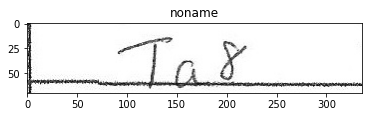

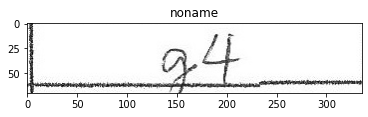

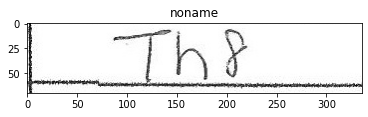

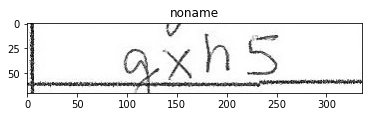

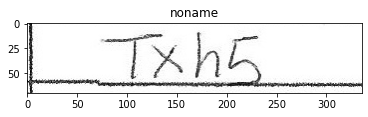

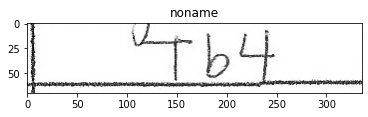

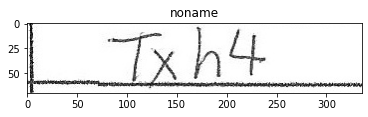

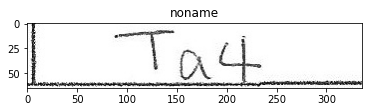

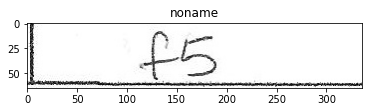

In [24]:
def cut( img):
    cuts= []
    for i in range(0,nlines):
      for j in [0,1]:
        cuts.append( img[ (i*h):(i+1)*h, (cols[j]):(cols[j]+w)])
    for i in range(0,nlines):
      for j in [2,3]:
        cuts.append( img[ (i*h):(i+1)*h, (cols[j]):(cols[j]+w)])
        
    return np.array( cuts)

cuts= cut( img)
for i in range( 0, len( cuts)):
    show_image( cuts[i])

In [21]:
label= read_label( 'C:/mestrado/datasets/handmade/sample_to_parts/labels/540.pgn')
labels= label.split()

In [14]:
label

['Nf3',
 'Nf6',
 'd4',
 'g6',
 'g3',
 'Bg7',
 'Bg2',
 'c5',
 'c4',
 'cxd4',
 'Nxd4',
 'Nc6',
 'O-O',
 'O-O',
 'Nc3',
 'Qb6',
 'Nc2',
 'd6',
 'b3',
 'Bd7',
 'Bb2',
 'Ne5',
 'Rb1',
 'Bc6',
 'Ne3',
 'Neg4',
 'Ned5',
 'Nxd5',
 'Nxd5',
 'Qd8',
 'Bxg7',
 'Kxg7',
 'Qd4+',
 'Nf6',
 'Nxf6',
 'exf6',
 'Rfd1',
 'Bxg2',
 'Kxg2',
 'Qa5',
 'Rb2',
 'Rad8',
 'Qd5',
 'Qc7',
 'Rbd2',
 'Rfe8',
 'Qd4',
 'b6',
 'Qf4',
 'Re5',
 'e3',
 'h5',
 'Rd5',
 'a5',
 'Qd4',
 'Qc6',
 'Kg1',
 'Rxd5',
 'Qxd5',
 'Qxd5',
 'Rxd5',
 'Kf8',
 'e4',
 'Ke7',
 'f3',
 'Kd7',
 'Kf2',
 'Kc6',
 'Ke3',
 'Re8',
 'Kd4',
 'Rh8',
 'h4',
 'Kc7',
 'a3',
 'Kc6',
 'Ke3',
 'Kd7',
 'Kf4',
 'Rh7',
 'Rd2',
 'Rh8',
 'Ke3',
 'Rc8',
 'Rd5',
 'a4',
 'Kd4',
 'axb3',
 'Rb5',
 'Kc6',
 'Rxb3',
 'Ra8',
 'g4',
 'Rh8',
 'gxh5',
 'Rxh5',
 'Rb4',
 'Rxh4',
 'Ra4',
 'f5',
 'Ra7',
 'fxe4',
 'fxe4',
 'f5',
 'Rg7',
 'Rxe4+',
 'Kd3',
 'Rg4']

In [16]:
print( len( cuts))
print( len( labels))

100
108


In [26]:
_dir= path.join( "/mestrado/datasets/handmade/sample_parts")
for i in range( 0, len( cuts)):
    tag= labels[i].ljust(5, '_')+ "_"+ str(i).zfill(5) 
    print( tag)
    
    write_label( path.join( _dir, "labels", tag+".pgn"), labels[i])
    write_image( path.join( _dir, "images", tag+".jpg"), cuts[i])

Nf3___00000
Nf6___00001
d4____00002
g6____00003
g3____00004
Bg7___00005
Bg2___00006
c5____00007
c4____00008
cxd4__00009
Nxd4__00010
Nc6___00011
O-O___00012
O-O___00013
Nc3___00014
Qb6___00015
Nc2___00016
d6____00017
b3____00018
Bd7___00019
Bb2___00020
Ne5___00021
Rb1___00022
Bc6___00023
Ne3___00024
Neg4__00025
Ned5__00026
Nxd5__00027
Nxd5__00028
Qd8___00029
Bxg7__00030
Kxg7__00031
Qd4+__00032
Nf6___00033
Nxf6__00034
exf6__00035
Rfd1__00036
Bxg2__00037
Kxg2__00038
Qa5___00039
Rb2___00040
Rad8__00041
Qd5___00042
Qc7___00043
Rbd2__00044
Rfe8__00045
Qd4___00046
b6____00047
Qf4___00048
Re5___00049
e3____00050
h5____00051
Rd5___00052
a5____00053
Qd4___00054
Qc6___00055
Kg1___00056
Rxd5__00057
Qxd5__00058
Qxd5__00059
Rxd5__00060
Kf8___00061
e4____00062
Ke7___00063
f3____00064
Kd7___00065
Kf2___00066
Kc6___00067
Ke3___00068
Re8___00069
Kd4___00070
Rh8___00071
h4____00072
Kc7___00073
a3____00074
Kc6___00075
Ke3___00076
Kd7___00077
Kf4___00078
Rh7___00079
Rd2___00080
Rh8___00081
Ke3___00082
Rc8_